In [93]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

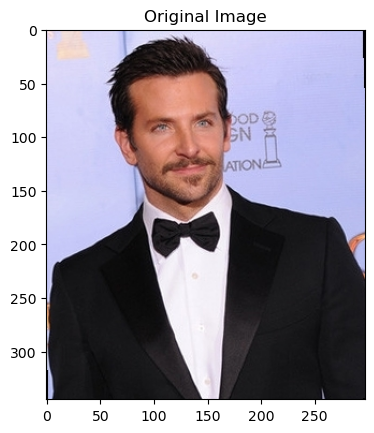

In [94]:
image = cv2.imread('./faces_imgs/2.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

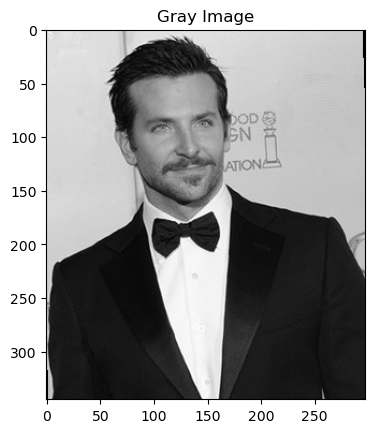

In [95]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title('Gray Image')
plt.show()

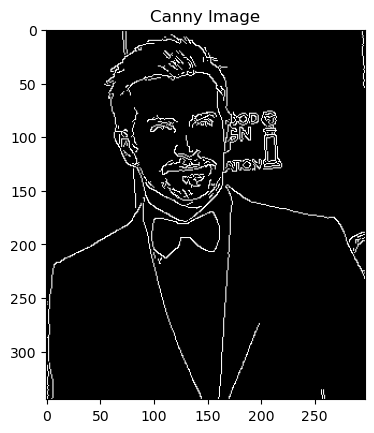

In [96]:
edges = cv2.Canny(gray, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title('Canny Image')
plt.show()

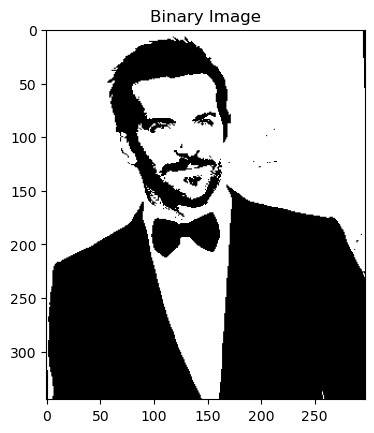

In [97]:
ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(binary, cmap='gray')
plt.title('Binary Image')
plt.show()

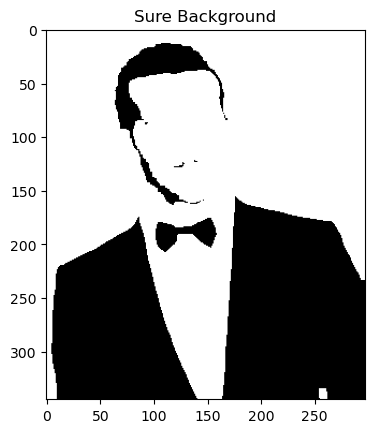

In [98]:
kernel = np.ones((3, 3), np.uint8)
sure_bg = cv2.dilate(binary, kernel, iterations=3)
plt.imshow(sure_bg, cmap='gray')
plt.title('Sure Background')
plt.show()

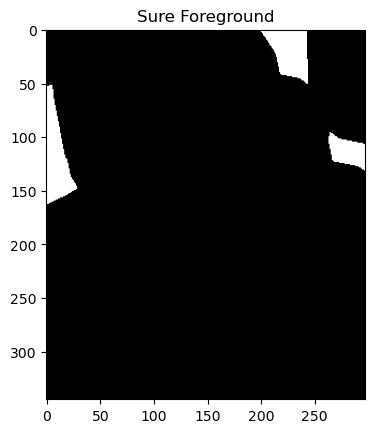

In [99]:
dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
plt.imshow(sure_fg, cmap='gray')
plt.title('Sure Foreground')
plt.show()

In [100]:
unknown = cv2.subtract(sure_bg, sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

In [101]:
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]

In [102]:
segmented_image = np.zeros_like(image)
for marker in np.unique(markers):
    if marker == -1 or marker == 1:
        continue
    segmented_image[markers == marker] = np.random.randint(0, 255, 3)

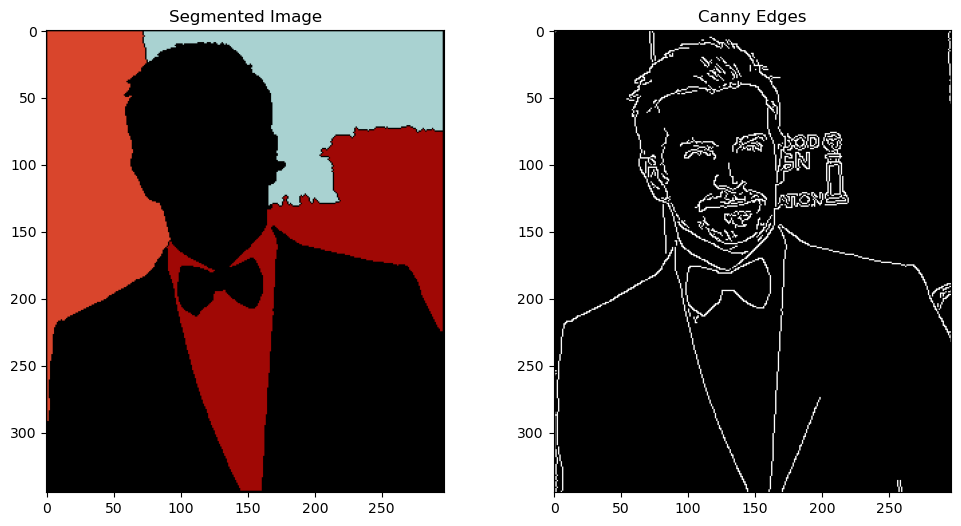

In [103]:
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)), plt.title('Segmented Image')
plt.subplot(122), plt.imshow(edges, cmap='gray'), plt.title('Canny Edges')
plt.show()